# Using Airlines Data to Predict Flights Delay

This Project aims at predicting the airlines delay and the factors affecting those delays. the dataset consisted of 1.9 Million rows and 30 columns, out of which we had taken the column "Arr Delay" as our target variable. There were other columns such as Year, MOnth, DepTIme, TailNumber, Cancelled, and various forms of delays.

We will be starting with cleaning of the data, then moving on to searching for further insights in the data, then preprocssing of the data and at the last data modelling and its performance evaluation.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import sklearn as skl
import plotly as ply

The first task is to mount the drive into google colab(or make it ready to go in Jupyter Notebook) and upload the file through it. The data set is very large, hence uploading the file directly to the google colab is not a physible option. Hence, we needed to take this approach to work on the Jupyter Notebook.

As said before we had had a dataset of 250 Mb which took a long amount of time, so started with cleaning the data and reducing its size. 

In [148]:
flights = pd.read_csv("DelayedFlights.csv")  #reading the dataset
flights

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Searching for any null values in columns present

In [153]:
flights.isna().sum()

Month                     0
DayOfWeek                 0
CRSDepTime                0
UniqueCarrier             0
AirTime                8387
ArrDelay               8387
Origin                    0
Dest                      0
TaxiIn                 7110
TaxiOut                 455
CancellationCode          0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Now checking for any columns which has correlation value over 0.9, we are doing so because it will not make any contribution to our data at a higher scale but it will take more space and time.

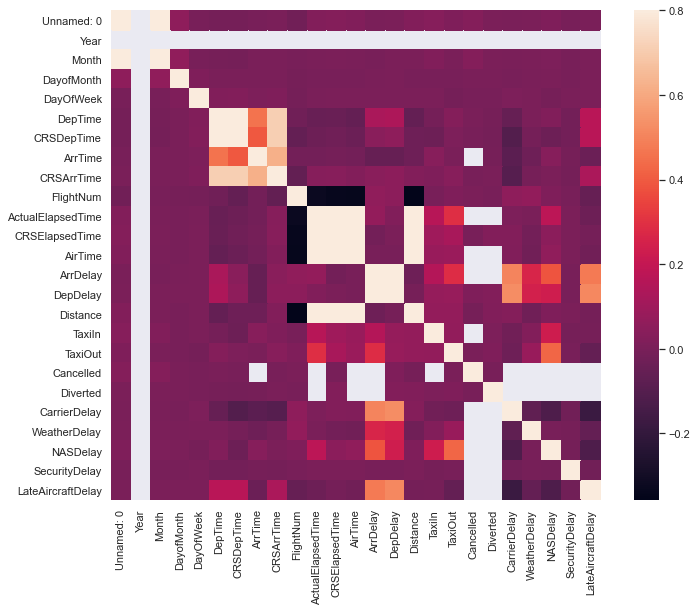

In [150]:
correlation_matrix = flights.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmax=.8, square=True);
plt.show()

Dropping the columns which as high amount of null values and high correlation values.

In [151]:
flights = flights.drop("Unnamed: 0",1) #Empty
flights = flights.drop("Year",1) #Converted to date
flights = flights.drop("DayofMonth",1) #Converted to date
flights = flights.drop("DepTime",1) #Of the departure data we only keep the expected 
flights = flights.drop("DepDelay",1)
flights = flights.drop("ArrTime",1)
flights = flights.drop("CRSArrTime",1)
flights = flights.drop("ActualElapsedTime",1)
flights = flights.drop("CRSElapsedTime",1)
flights = flights.drop("Diverted",1)
flights = flights.drop("Cancelled",1)
flights = flights.drop("Distance",1)
flights = flights.drop("FlightNum",1)
flights = flights.drop("TailNum",1)

In [152]:
flights.dropna()

,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,1,4,1755,WN,77.0,34.0,IND,BWI,3.0,10.0,N,2.0,0.0,0.0,0.0,32.0
5,1,4,1830,WN,230.0,57.0,IND,LAS,3.0,7.0,N,10.0,0.0,0.0,0.0,47.0
7,1,4,1510,WN,107.0,80.0,IND,MCO,6.0,8.0,N,8.0,0.0,0.0,0.0,72.0
9,1,4,1425,WN,213.0,15.0,IND,PHX,7.0,8.0,N,3.0,0.0,0.0,0.0,12.0
11,1,4,1255,WN,110.0,16.0,IND,TPA,4.0,9.0,N,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,12,6,830,DL,82.0,64.0,ATL,PBI,8.0,21.0,N,51.0,0.0,13.0,0.0,0.0
1936752,12,6,1520,DL,27.0,17.0,HSV,ATL,9.0,7.0,N,0.0,0.0,0.0,0.0,17.0
1936753,12,6,1220,DL,120.0,25.0,MSP,ATL,9.0,18.0,N,3.0,0.0,0.0,0.0,22.0
1936754,12,6,600,DL,78.0,75.0,RIC,ATL,15.0,34.0,N,0.0,57.0,18.0,0.0,0.0


New updated dataset.

In [46]:
flights1 = pd.read_csv("flights (1).csv")
flights1

,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,4,1755,WN,77.0,34.0,IND,BWI,3.0,10.0,N,2.0,0.0,0.0,0.0,32.0
1,1,4,1830,WN,230.0,57.0,IND,LAS,3.0,7.0,N,10.0,0.0,0.0,0.0,47.0
2,1,4,1510,WN,107.0,80.0,IND,MCO,6.0,8.0,N,8.0,0.0,0.0,0.0,72.0
3,1,4,1425,WN,213.0,15.0,IND,PHX,7.0,8.0,N,3.0,0.0,0.0,0.0,12.0
4,1,4,1255,WN,110.0,16.0,IND,TPA,4.0,9.0,N,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247483,12,6,830,DL,82.0,64.0,ATL,PBI,8.0,21.0,N,51.0,0.0,13.0,0.0,0.0
1247484,12,6,1520,DL,27.0,17.0,HSV,ATL,9.0,7.0,N,0.0,0.0,0.0,0.0,17.0
1247485,12,6,1220,DL,120.0,25.0,MSP,ATL,9.0,18.0,N,3.0,0.0,0.0,0.0,22.0
1247486,12,6,600,DL,78.0,75.0,RIC,ATL,15.0,34.0,N,0.0,57.0,18.0,0.0,0.0


In [ ]:
flights1 = pd.read_csv("flights (1).csv")

This the new updated dataset after cleaning the data.

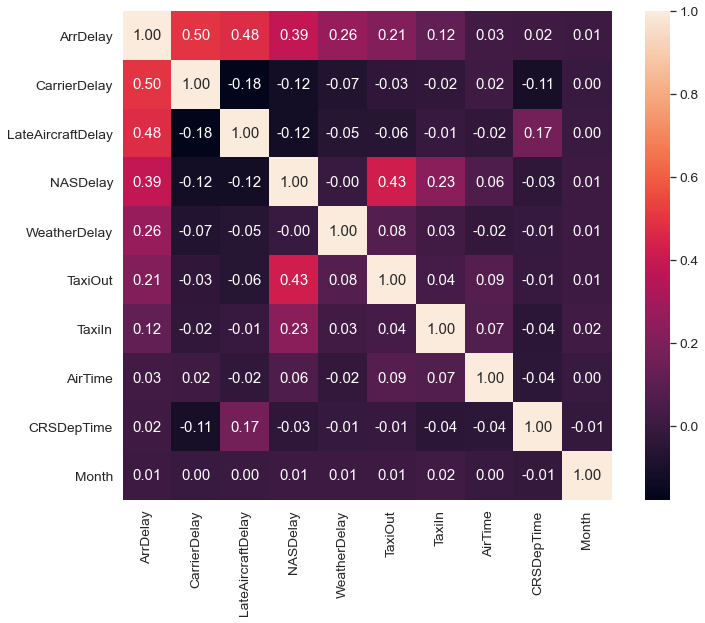

In [47]:
delcorrmat = flights1.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ArrDelay')['ArrDelay'].index
cm = np.corrcoef(flights1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


Now we are focusing on the factors leading to the delays of flights such as 'LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'. Here we can see that the major reason of the flight delays is late Aircraft delays which includes the ground delays and takeoff delays.

<ipython-input-139-efcb65adce3d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()


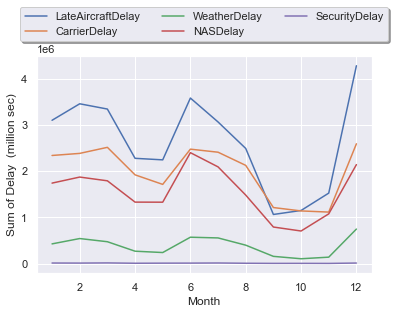

In [139]:
df2 = flights1.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.ylabel('Sum of Delay  (million sec)')
plt.show()

Here we made pairplot to get more insights about the data, we can see that the arrival delays are majorly dependent on the various types of delays.

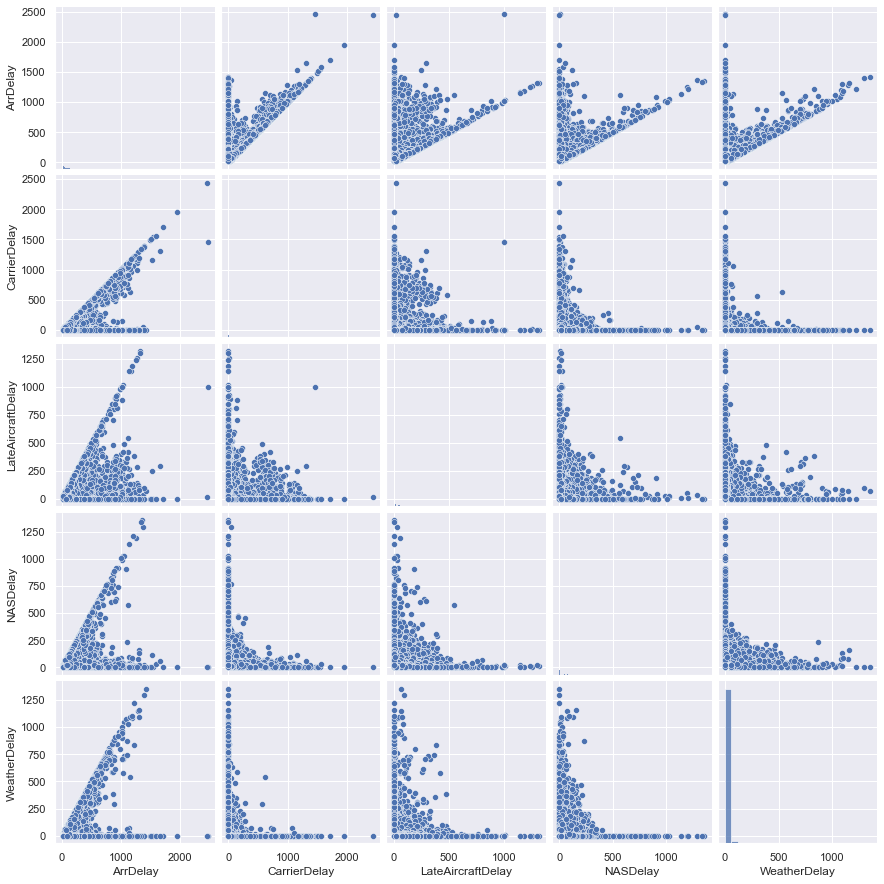

In [49]:
sns.set()
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(flights1[cols], height = 2.5)
plt.show()

We move on to the unique carrier column we tells about the various airlines which are flying in the sky and how they are performing in terms of delays.

In [50]:
print(flights1['UniqueCarrier'].value_counts())

WN    203559
AA    132257
MQ     97555
UA     95465
OO     88991
DL     72252
XE     72008
US     59508
CO     58958
EV     56781
NW     54744
YV     50646
FL     46991
OH     39293
B6     38232
9E     35631
AS     24012
F9     15940
HA      4325
AQ       340
Name: UniqueCarrier, dtype: int64


Through this visualization we can clearly see the average arrival delay of any unique flight carriers like Northwest Airlines, Southwest Airlines, United Airlines, Mesa Airlines has the highest Average flight delay. 4 from the top 5 companies in the domestic market (Southwest Airlines (WN), American Eagle Airlines (MQ), United Airlines (UA) and Skywest Airlines (OO) create an average delay below the mean (19 minutes). Southwest Airlines, with an outstanding 11.7 minutes per flight, the second lowest of all the carriers.

We carry out the visualization for delay distribution by individual carriers. We find out outliers and through those outliers we take a close look at the meteorological data and find out that the large delay in a single instance was due to a very heavy snowstorm in Chicago.


/Users/ashishsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ashishsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


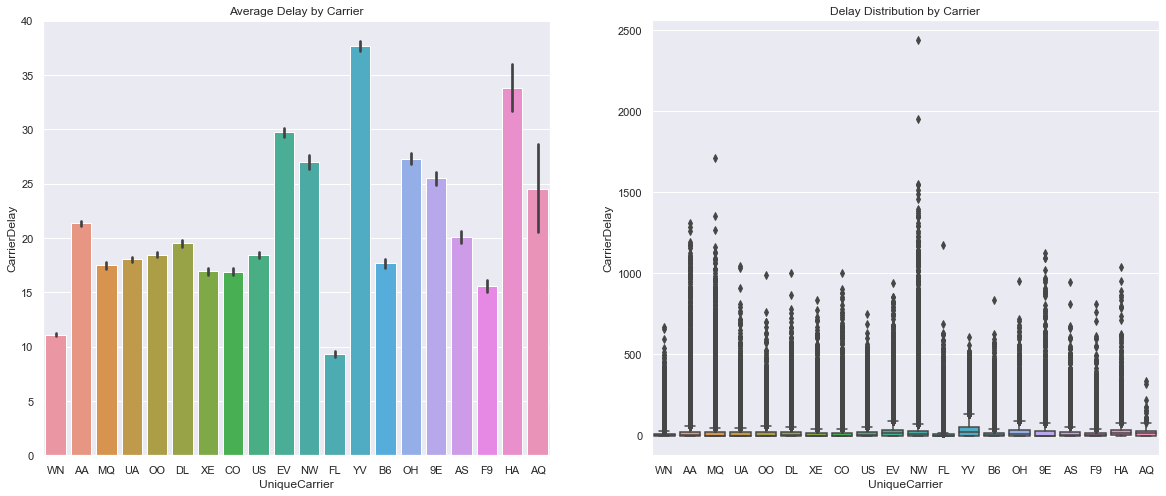

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [51]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('UniqueCarrier','CarrierDelay', data=flights1,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('UniqueCarrier','CarrierDelay', data=flights1,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

In [52]:
Top20airports = flights1[(flights1.Origin == 'ORD') | (flights1.Origin == 'ATL') |
                               (flights1.Origin == 'DFW') | (flights1.Origin == 'DEN') |
                               (flights1.Origin == 'EWR') | (flights1.Origin == 'LAX') | 
                               (flights1.Origin == 'IAH') | (flights1.Origin == 'PHX') |
                               (flights1.Origin == 'DTW') | (flights1.Origin == 'SFO') | 
                               (flights1.Origin == 'LAS') | (flights1.Origin == 'DEN') |
                               (flights1.Origin == 'ORD') | (flights1.Origin == 'JFK') | 
                               (flights1.Origin == 'CLT') | (flights1.Origin == 'LGA') |
                               (flights1.Origin == 'MCO') | (flights1.Origin == 'MSP') | 
                               (flights1.Origin == 'BOS') | (flights1.Origin == 'PHL')]

print(Top20airports['Origin'].value_counts())

ORD    90611
ATL    87741
DFW    62073
DEN    46477
EWR    36115
LAX    33713
IAH    33166
PHX    31002
DTW    30732
SFO    30110
LAS    30041
JFK    23870
CLT    23318
LGA    22807
MCO    22290
MSP    22149
BOS    19816
PHL    19302
Name: Origin, dtype: int64


Preprocessing of the data we first did label encoding to convert the text data into numerical data to make it as the machine readable form. It is an important part of the preprocessing of the data.

In [53]:
#labeling text to numeric
from sklearn import preprocessing
from collections import defaultdict

# select text columns
cat_cols = flights1.select_dtypes(include='object').columns

# this is a way to apply label_encoder to all category cols at once, returning a label encoder per categorical column, in a dict d 
d = defaultdict(preprocessing.LabelEncoder)

 # transform all text columns to numbers
flights1[cat_cols] = flights1[cat_cols].apply(lambda x: d[x.name].fit_transform(x.astype(str)))

In [54]:
flights1

,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,4,1755,17,77.0,34.0,140,48,3.0,10.0,0,2.0,0.0,0.0,0.0,32.0
1,1,4,1830,17,230.0,57.0,140,155,3.0,7.0,0,10.0,0.0,0.0,0.0,47.0
2,1,4,1510,17,107.0,80.0,140,177,6.0,8.0,0,8.0,0.0,0.0,0.0,72.0
3,1,4,1425,17,213.0,15.0,140,220,7.0,8.0,0,3.0,0.0,0.0,0.0,12.0
4,1,4,1255,17,110.0,16.0,140,284,4.0,9.0,0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247483,12,6,830,6,82.0,64.0,18,215,8.0,21.0,0,51.0,0.0,13.0,0.0,0.0
1247484,12,6,1520,6,27.0,17.0,133,18,9.0,7.0,0,0.0,0.0,0.0,0.0,17.0
1247485,12,6,1220,6,120.0,25.0,199,18,9.0,18.0,0,3.0,0.0,0.0,0.0,22.0
1247486,12,6,600,6,78.0,75.0,241,18,15.0,34.0,0,0.0,57.0,18.0,0.0,0.0


In [55]:
flights1['CancellationCode'].value_counts()

0    1247488
Name: CancellationCode, dtype: int64

In [56]:
flights1.drop('CancellationCode',axis=1,inplace=True)

In [128]:
flights1['ArrDelay'].value_counts()

15.0      32476
16.0      31198
17.0      30288
18.0      29816
19.0      28658
          ...  
1123.0        1
1119.0        1
960.0         1
891.0         1
1072.0        1
Name: ArrDelay, Length: 1044, dtype: int64

/Users/ashishsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ArrDelay'>

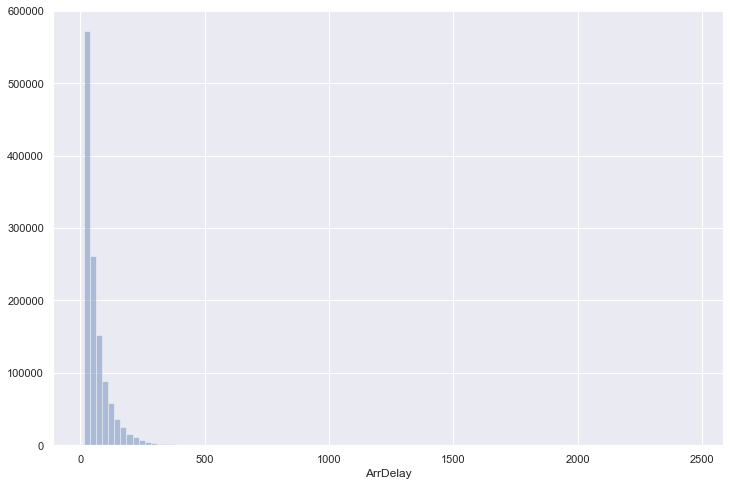

In [163]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(flights1['ArrDelay'],bins = 100,kde= False)

In [57]:
flights1.columns

Index(['Month', 'DayOfWeek', 'CRSDepTime', 'UniqueCarrier', 'AirTime',
       'ArrDelay', 'Origin', 'Dest', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
Now, we are moving to the data modelling phase to predict correctly on the delays.

In [58]:
X = flights1.drop('ArrDelay',axis = 1)
X.shape

(1247488, 14)

In [59]:
y = flights1['ArrDelay']
y

0          34.0
1          57.0
2          80.0
3          15.0
4          16.0
           ... 
1247483    64.0
1247484    17.0
1247485    25.0
1247486    75.0
1247487    99.0
Name: ArrDelay, Length: 1247488, dtype: float64

Ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

In [129]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
X_stand = scaled_data

In [130]:
scaled_data.mean(axis = 0)

array([ 7.04272812e-16, -1.36060987e-16, -4.67054628e-17, -5.83248706e-17,
        5.51807955e-17, -1.00245871e-16,  4.62953660e-17,  1.85910525e-17,
       -1.19839383e-17, -2.55399140e-17,  1.76797264e-17, -5.22018983e-17,
       -4.46549790e-18,  5.17633226e-17])

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Performing PCA analysis to find out that the number of features are correctly taken or not, in order to get the variance percentage over 80%

Text(0.5, 1.0, 'Principal Component Analysis')

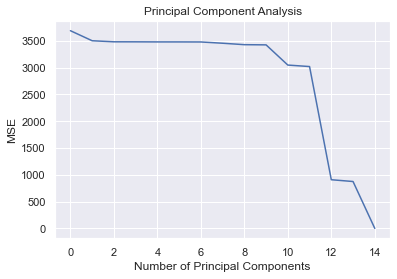

In [141]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr, np.ones((len(X_reduced),1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 15):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Principal Component Analysis')



In [135]:
#calculate percentage of variation explained
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)



array([11.84, 21.17, 29.48, 37.6 , 45.4 , 52.61, 59.78, 66.9 , 73.98,
       80.08, 86.02, 91.49, 96.54, 99.99])

In [80]:
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler


Splitting the dataset and performing various regression models to get the best predictive algorithm.

In [164]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

58.955975925368776

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

Trained and evaluated different machine learning models such as Linear Regression, KNN Regressor, Decision Tree Regressor, Lasso and Ridge Regression to compare models

## Linear Regression

In [86]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred_train = model.predict(X_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, y_pred_train))

Coefficients: [-6.77693431e-15 -4.51028104e-15 -1.38777878e-17  1.62521906e-16
 -1.46800974e-16  1.90819582e-16 -1.21430643e-16 -6.24500451e-16
 -2.57649804e-15  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
Intercept: 1.0658141036401503e-13
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 1.00


In [90]:
y_pred_test = model.predict(X_test)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))

Coefficients: [-6.77693431e-15 -4.51028104e-15 -1.38777878e-17  1.62521906e-16
 -1.46800974e-16  1.90819582e-16 -1.21430643e-16 -6.24500451e-16
 -2.57649804e-15  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
Intercept: 1.0658141036401503e-13
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 1.00


## Decision Tree Regressor

In [97]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
!pip3 install scipy

In [112]:
rt = DecisionTreeRegressor(criterion = "mse", max_depth=5)


In [113]:
model_r = rt.fit(X_train, y_train)

In [114]:
y_pred_dt = model_r.predict(X_test)

In [ ]:
conda install -c anaconda pydot

In [121]:
conda install -c anaconda python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [116]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_dt))

Mean Absolute Error: 19.614953121802515


In [117]:
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_dt))

Mean Squared Error: 707.6403628725395


In [118]:
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

Root Mean Squared Error: 26.60151053742136


In [119]:
print("R Squared Score is:", r2_score(y_test, y_pred_dt))

R Squared Score is: 0.807806728806218


In [120]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)

CarrierDelay 0.4151129110408513
LateAircraftDelay 0.31617801595751577
NASDelay 0.1928997552309209
WeatherDelay 0.07580931777071208
UniqueCarrier 0.0
TaxiOut 0.0
TaxiIn 0.0
SecurityDelay 0.0
Origin 0.0
Month 0.0
Dest 0.0
DayOfWeek 0.0
CRSDepTime 0.0
AirTime 0.0


## KNN Regressor

In [81]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse

print( error)

11.766791105622152


In [82]:
score = model.score(X_train, y_train)
print(score)

0.982472931931554


## Multiple Regressions

In this step we implemented the model using the holdout validation method. In this step we experimented on the model performances of Linear Regression, Lasso, Ridge and KNN Regressors.

This shows that KNN regressor has a better performance all over having the lowest RMSE value and highest r squared value.

In [145]:
# multiple models with holdout validation
from sklearn import neighbors
from sklearn.metrics import *
mm = pd.DataFrame(columns=['t_model', 'rmse', 'mae','r-squared'])
index = 0
model = [linear_model.LinearRegression(), 
              linear_model.Lasso(alpha=1),
              linear_model.Ridge(alpha=1),
              neighbors.KNeighborsRegressor(n_neighbors=3),
              DecisionTreeRegressor(criterion = "mse", max_depth=5)]
for t_o_m in model:
    t_o_m.fit(X_train, y_train)  
    pred = t_o_m.predict(X_test) 
    rmse = mean_squared_error(y_test, pred, squared=False)
    mae = mean_absolute_error(y_test, pred)
    rsquared = r2_score(y_test,pred)
    
    mm.loc[index] = [t_o_m, rmse, mae, rsquared]
    index+=1
mm

,t_model,rmse,mae,r-squared
0,LinearRegression(),1.498617e-13,1.148305e-13,1.000000
1,Lasso(alpha=1),4.599679e-01,8.567211e-02,0.999942
2,Ridge(alpha=1),5.275093e-07,9.978124e-08,1.000000
3,KNeighborsRegressor(n_neighbors=3),1.169378e+01,7.384141e+00,0.962685
4,DecisionTreeRegressor(max_depth=5),2.639902e+01,1.954467e+01,0.809827


## Conclusion

The final performance of best models are evaluated with an unseen test data and also compared models created from good understanding of data. We were able to get insights of Flight Delays occur and what are the reasons impacting the Delays. We were able to find the best performed Regression Model which is KNN Regressor with K value = 3 and efficiency of 96.26%